# Web Mining and Applied NLP (44-620)

## Requests, JSON, and NLP

### Student Name: Ash Hoskins S559245

https://github.com/Hoskins-s559245/A4-S559245

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Make sure you have [installed spaCy and its pipeline](https://spacy.io/usage#quickstart) and [spaCyTextBlob](https://spacy.io/universe/project/spacy-textblob)

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

This assignment requires that you write additional files (either JSON or pickle files); make sure to submit those files in your repository as well.

1. The following code accesses the [lyrics.ovh](https://lyricsovh.docs.apiary.io/#reference/0/lyrics-of-a-song/search) public api, searches for the lyrics of a song, and stores it in a dictionary object.  Write the resulting json to a file (either a JSON file or a pickle file; you choose). You will read in the contents of this file for future questions so we do not need to frequently access the API.

In [166]:
import json
import spacy as spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from lyricsgenius import Genius


with open('C:/Users/Hoski/Desktop/MSDA Summer/44-620 Mining/Module 4/key.txt', 'r') as f:
   token = f.readline()
   
genius = Genius(token)

song = genius.search_song("Birdhouse in your soul")
lyrics = song.lyrics

print(song.artist)
print(lyrics)

Searching for "Birdhouse in your soul"...
Done.
They Might Be Giants
52 ContributorsBirdhouse in Your Soul Lyrics[Bridge]
I'm your only friend
I'm not your only friend
But I'm a little glowing friend
But really I'm not actually your friend
But I am

[Chorus]
Blue canary in the outlet by the light switch
Who watches over you
Make a little birdhouse in your soul
Not to put too fine a point on it
Say I'm the only bee in your bonnet
Make a little birdhouse in your soul

[Verse 1]
I have a secret to tell
From my electrical well
It's a simple message and I'm
Leaving out the whistles and bells
So the room must listen to me
Filibuster vigilantly
My name is blue canary
One note spelled l-i-t-e
My story's infinite
Like the Longines Symphonette
It doesn't rest
See They Might Be Giants LiveGet tickets as low as $35You might also like[Chorus]
Blue canary in the outlet by the light switch
Who watches over you
Make a little birdhouse in your soul
Not to put too fine a point on it
Say I'm the only bee

In [167]:
json_object = json.dumps(lyrics, indent=4)

with open("Question1.json", "w") as outfile:
    outfile.write(json_object)



2. Read in the contents of your file.  Print the lyrics of the song (not the entire dictionary!) and use spaCyTextBlob to perform sentiment analysis on the lyrics.  Print the polarity score of the sentiment analysis.  Given that the range of the polarity score is `[-1.0,1.0]` which corresponds to how positive or negative the text in question is, do you think the lyrics have a more positive or negative connotaion?  Answer this question in a comment in your code cell.

In [168]:
with open('Question1.json') as json_file:
    data = json.load(json_file)

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
final = nlp(data)
print("Polarity Score")
print(final._.blob.polarity)
print("Subjectivity Score")
print(final._.blob.subjectivity)
print("Sentiment Analysis Scores")
print(final._.blob.sentiment_assessments.assessments)

## Question 2 - Do the Lyrics have a positive or negative connotation - Positive the lowest value is the word "little" which has a -.1875; with the highest being .5. The Polarity score is also Positive.

Polarity Score
0.02575757575757576
Subjectivity Score
0.5308441558441559
Sentiment Analysis Scores
[(['only'], 0.0, 1.0, None), (['only'], 0.0, 1.0, None), (['little'], -0.1875, 0.5, None), (['really', 'not', 'actually'], -0.0, 0.1, None), (['blue'], 0.0, 0.1, None), (['light'], 0.4, 0.7, None), (['little'], -0.1875, 0.5, None), (['fine'], 0.4166666666666667, 0.5, None), (['only'], 0.0, 1.0, None), (['little'], -0.1875, 0.5, None), (['secret'], -0.4, 0.7, None), (['simple'], 0.0, 0.35714285714285715, None), (['blue'], 0.0, 0.1, None), (['low'], 0.0, 0.3, None), (['blue'], 0.0, 0.1, None), (['light'], 0.4, 0.7, None), (['little'], -0.1875, 0.5, None), (['fine'], 0.4166666666666667, 0.5, None), (['only'], 0.0, 1.0, None), (['little'], -0.1875, 0.5, None), (['only'], 0.0, 1.0, None), (['only'], 0.0, 1.0, None), (['little'], -0.1875, 0.5, None), (['really', 'not', 'actually'], -0.0, 0.1, None), (['opposite'], 0.0, 0.0, None), (['countless'], 0.0, 0.5, None), (['blue'], 0.0, 0.1, None), (['

3. Write a function that takes an artist, song, and filename, accesses the lyrics.ovh api to get the song lyrics, and writes the results to the specified filename.  Test this function by getting the lyrics to any four songs of your choice and storing them in different files.

In [210]:
def music(msong, file):
    with open('C:/Users/Hoski/Desktop/MSDA Summer/44-620 Mining/Module 4/key.txt', 'r') as f:
            musictoken = f.readline()
   
    musicgenius = Genius(musictoken)

    musicsong = musicgenius.search_song(msong)
    musiclyrics = musicsong.lyrics
    art = musicsong.artist
    dict = {
          "Artist": art,
          "Song": msong,
          "Lyrics": musiclyrics
    }
    mobject = json.dumps(dict, indent=4)

    with open(file, "w") as outfile:
        outfile.write(mobject)

In [227]:
music("Money For Nothing", "Direstraits.json")
music("Everytime I die", "CoB.json")
music("Together we Rise", "Windrose.json")
music("Fear of the Dark", "IronMaiden.json")
music("La Grange", "ZZtop.json")

Searching for "Money For Nothing"...
Done.
Searching for "Everytime I die"...
Done.
Searching for "Together we Rise"...
Done.
Searching for "Fear of the Dark"...
Done.
Searching for "La Grange"...
Done.


4. Write a function that takes the name of a file that contains song lyrics, loads the file, performs sentiment analysis, and returns the polarity score.  Use this function to print the polarity scores (with the name of the song) of the three files you created in question 3.  Does the reported polarity match your understanding of the song's lyrics? Why or why not do you think that might be?  Answer the questions in either a comment in the code cell or a markdown cell under the code cell.

In [228]:
def analysis(filename):
    with open(filename) as json_file:
        x = json.load(json_file)

    nlp = spacy.load('en_core_web_sm')
    nlp.add_pipe('spacytextblob')
    analyzedlyrics = nlp(x['Lyrics'])
    print("")
    print("Artist: ", x["Artist"])
    print("Song Title: ", x["Song"])
    print("Polarity Score")
    print(analyzedlyrics._.blob.polarity)
    #print("Subjectivity Score")
    #print(analyzedlyrics._.blob.subjectivity)
    print("Sentiment Analysis Scores")
    print(analyzedlyrics._.blob.sentiment_assessments.assessments)

In [229]:
analysis("Direstraits.json")
print("")
analysis("CoB.json")
print("")
analysis("Windrose.json")
print("")
analysis("IronMaiden.json")
print("")
analysis("ZZtop.json")


Artist:  Dire Straits
Song Title:  Money For Nothing
Polarity Score
0.3185483870967743
Sentiment Analysis Scores
[(['free'], 0.4, 0.8, None), (['dumb'], -0.375, 0.5, None), (['little'], -0.1875, 0.5, None), (['little'], -0.1875, 0.5, None), (['own'], 0.6, 1.0, None), (['little'], -0.1875, 0.5, None), (['own'], 0.6, 1.0, None), (['little'], -0.1875, 0.5, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['free'], 0.4, 0.8, None), (['easy'], 0.43333333333333335, 0.8333333333333334, None), (['easy'], 0.43333333333333335, 0.8333333333333334, None), (['easy'], 0.43333333333333335, 0.8333333333333334, None), (['easy'], 0.43333333333333335, 0.8333333333333334, None), (['free'

 #### Does the reported polarity match your understanding of the song's lyrics? Why or why not do you think that might be?  Answer the questions in either a comment in the code cell or a markdown cell under the code cell.


For the most part it did match what I knew of the lyrics, what suprised me though is the last song I did "Fear of the Dark" by Iron Maiden, because that song is so long (8 minutes), and has a very indepth description to the lyrics; I feel certain words like "dark" brought the score down dramatically. Where as the song "Everytime I die" is much shorter and well deserved lower score.


## Extra work, attempted to plot polarity scores of all 5 songs

In [230]:
import matplotlib
import numpy as np

def plot(files):
    with open(files) as json_file:
        x2 = json.load(json_file)

    nlp2 = spacy.load('en_core_web_sm')
    nlp2.add_pipe('spacytextblob')
    analyzedlyrics2 = nlp2(x2['Lyrics'])
    anoart = x2["Artist"]

    return analyzedlyrics2._.blob.polarity

def anno(files2):
    with open(files2) as json_file:
        x3 = json.load(json_file)
  
    anoart = x3["Artist"]
    return anoart

files = ["CoB.json", "Direstraits.json", "IronMaiden.json", "Windrose.json", "ZZtop.json"]
polaritylist = []
annoart = []

for x in files: 
    polaritylist.append(plot(x))
    annoart.append(anno(x))


print(polaritylist)
print(annoart)

[-0.12377777777777778, 0.3185483870967743, -0.09722222222222227, 0.0062326388888888805, 0.182010582010582]
['Children of Bodom', 'Dire Straits', 'Iron Maiden', 'Wind Rose', 'ZZ Top']


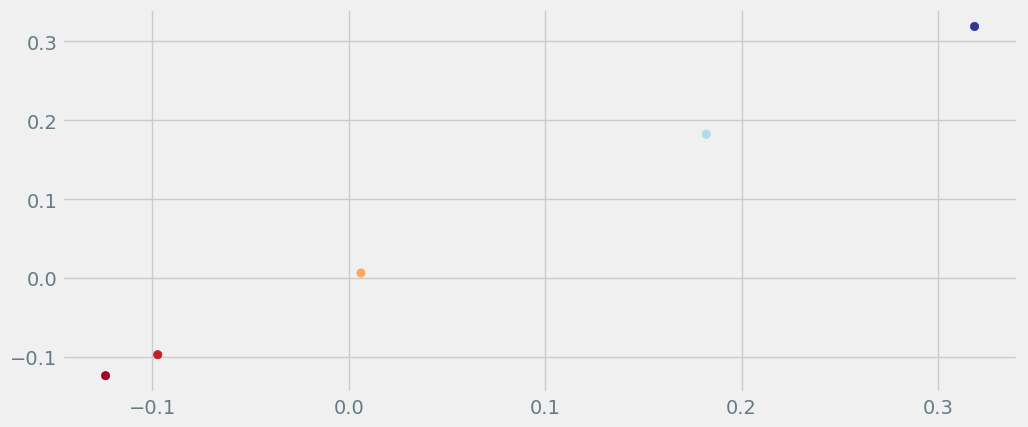

In [231]:
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True

ax = plt.scatter(polaritylist[:], polaritylist[:], c=polaritylist[:], cmap='RdYlBu')
    

plt.show()